# Intro through CSV Quiz

In [1]:
import unicodecsv

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [2]:
import unicodecsv

with open('daily_engagement.csv', 'rb') as d:
    engreader = unicodecsv.DictReader(d)
    daily_engagement = list(engreader)

with open('project_submissions.csv', 'rb') as p:
    subreader = unicodecsv.DictReader(p)
    project_submissions = list(subreader)

print (daily_engagement[0])
print (project_submissions[0])

OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [3]:
#REad CSVs but with a function
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print (enrollments[0])
print(" ")
print (daily_engagement[0])
print(" ")
print (project_submissions[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
 
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
 
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


# Fixing Data types

### All the values appear as strings, so we need to update all data types upfront so that we dont have to mess with it later

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Questions I could ask this data
#### Does the number of classes coorelate to project complete rate, 
#### How many courses are actually completed, 
#### how much longer does it take someone to complete a course than approximated, 
#### does the number of courses looked at coorelate to the number complete?

# Investigate data quiz

#### find the number of rows in each file and the number of unique students in each

### Fix data problems

In [7]:
#make "account name" consistent
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record.pop('acct')

In [8]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [9]:
#rows in ENROLLMENT file
row_count = sum(1 for row in enrollments) 

print("Number of rows in ENROLLMENT " + str(row_count))

Number of rows in ENROLLMENT 1640


In [10]:
#unique students in ENROLLMENT file
unique_enrollment_students=get_unique_students(enrollments)

print("Unique number of students in ENROLLMENT " + str(len(unique_enrollment_students)))

Unique number of students in ENROLLMENT 1302


In [11]:
#rows in DAILY ENGAGEMENT file
row_count = sum(1 for row in daily_engagement) 

print("Number of rows in DAILY ENGAGEMENT " + str(row_count))

Number of rows in DAILY ENGAGEMENT 136240


In [12]:
#unique students in DAILY ENGAGEMENT file
unique_engagement_students=get_unique_students(daily_engagement)


print("Unique number of students in DAILY ENGAGEMENT " + str(len(unique_engagement_students)))

Unique number of students in DAILY ENGAGEMENT 1237


In [13]:
#rows in PROJECT SUBMISSIONS file
row_count = sum(1 for row in project_submissions) 

print("Number of rows in PROJECT SUBMISSIONS " + str(row_count))

Number of rows in PROJECT SUBMISSIONS 3642


In [14]:
#unique students in PROJECT SUBMISSIONS file
unique_project_students=get_unique_students(project_submissions)


print("Unique number of students in PROJECT SUBMISSIOMS " + str(len(unique_project_students)))

Unique number of students in PROJECT SUBMISSIOMS 743


In [15]:
#Missing engagement records
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print (enrollment)
        break

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


In [16]:
#Count missing engagement records
counter = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        counter +=1
print (counter)

71


In [17]:
#Count missing engagement records AND one or more days of enrollment
counter = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:      
        if enrollment['days_to_cancel'] != 0:
            counter +=1
            print (enrollment)
print (counter)

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
3


#### In the above, we found that the problem accounts are due to udacity test accounts ("is udacity"), we'll now get rid of those accounts

In [18]:
#create a set of udacity test accounts
udacity_test_accounts = set()

for enrollment in enrollments:
    if enrollment['is_udacity'] == True:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)
        

6

In [19]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts COPIED
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [20]:
# Remove Udacity test accounts from all three tables COPIED
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


### Refining the question

In [22]:
# create a dictionary with students who either havent canceled or have been enrolled  for more than 7 days
paid_students ={}

#note: needed to use the new list that doesnt include the test accounts

for students in non_udacity_enrollments:
    if students['days_to_cancel'] == None:
        paid_students.update({students['account_key']:students['join_date']})
    else:
        if students['days_to_cancel'] > 7:
                paid_students.update({students['account_key']:students['join_date']})

print (len(paid_students))

995


In [23]:
# UPDATED version to add latest date
# create a dictionary with students who either havent canceled or have been enrolled  for more than 7 days
paid_students ={}

#note: needed to use the new list that doesnt include the test accounts

for students in non_udacity_enrollments:
    if students['days_to_cancel'] == None or students['days_to_cancel'] > 7:
        if students['account_key'] not in paid_students or students['join_date'] > paid_students[students['account_key']]:
            paid_students[students['account_key']] = students['join_date']
        
#        paid_students.update({students['account_key']:students['join_date']})
   

print (len(paid_students))

995


### Explore student engagement data

In [24]:
# COPIED . - get data from first week
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print (len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
         paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

1293
134549
3618


6919

In [41]:
#COPIED
#number of visits in the frist week
#nunmber of days students visit a program in their first week
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited']>0:
        engagement_record['has_visited']=1
    else:
        engagement_record['has_visited'] = 0

In [42]:
# COPIED FROM UDACITY
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [43]:
# COPIED
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [44]:
# COPIED - Updated the dictionary to list in order to work with python 3
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())
print ('Mean:'+ str(np.mean(total_minutes)))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

Mean:306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


In [45]:
# COPIED . Find the student with the max minutes spent
student_with_max_minutes = None
max_minutes=0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
max_minutes

3564.7332644989997

In [46]:
#COPIED - print engagement record

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print (engagement_record)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_c

In [47]:
import numpy as np

#Run stats on number of lessons

total_lessons_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons = 0
    for engagement_record in engagement_for_student:
        total_lessons += engagement_record['lessons_completed']
    total_lessons_by_account[account_key] = total_lessons

# Summarize the data about minutes spent in the classroom
total_lessons = list(total_lessons_by_account.values())
print ('Mean:'+ str(np.mean(total_lessons)))
print ('Standard deviation:', np.std(total_lessons))
print ('Minimum:', np.min(total_lessons))
print ('Maximum:', np.max(total_lessons))

Mean:1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


In [48]:
##Copied - make the above to functions
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,
                                             'total_minutes_visited')

import numpy as np

def describe_data(data):
    print ('Mean:'+ str(np.mean(list(data))))
    print ('Standard deviation:'+ str(np.std(list(data))))
    print ('Minimum:'+ str(np.min(list(data))))
    print ('Maximum:'+ str(np.max(list(data))))

In [49]:
describe_data(total_minutes_by_account.values())

Mean:306.70832675342825
Standard deviation:412.99693340852957
Minimum:0.0
Maximum:3564.7332644989997


In [50]:
#Investigate data
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')

describe_data(days_visited_by_account.values())

Mean:2.8673366834170855
Standard deviation:2.2551980029196814
Minimum:0
Maximum:7


In [51]:
## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
# blank - Project has not yet been evaluated.
#INCOMPLETE - Project did not meet specifications.
#PASSED - Project met specifications.
#DISTINCTION - Project exceeded specifications.
#UNGRADED - The submission could not be evaluated

subway_project_lesson_keys = ['746169184', '3176718735']
passing_engagement =set()
non_passing_engagement = set()
for engagement in paid_engagement_in_first_week:
    for projects in paid_submissions:
        if projects['lesson_key'] == '746169184' or projects['lesson_key'] == '3176718735':
            if projects['account_key'] == engagement['account_key']:
                if projects['assigned_rating'] == 'PASSED' or projects['assigned_rating'] =='DISTINCTION':
                    passing_engagement.add(engagement['account_key'])
                elif projects['assigned_rating'] == 'INCOMPLETE':
                    non_passing_engagement.add(engagement['account_key'])
print ("Passing projects" + len(passing_engagement))
print ("Non passing projects" + len(non_passing_engagement))

TypeError: must be str, not int

In [ ]:
subway_project_lesson_keys = ['746169184', '3176718735']
passing_engagement =[]
non_passing_engagement = []
for engagement in paid_engagement_in_first_week:
    for projects in paid_submissions:
        if projects['lesson_key'] == '746169184' or projects['lesson_key'] == '3176718735':
            if projects['account_key'] == engagement['account_key']:
                if projects['assigned_rating'] == 'PASSED' or projects['assigned_rating'] =='DISTINCTION':
                    passing_engagement.append(engagement)
                else:
                    non_passing_engagement.append(engagement)
print ("Passing engagements" + str(len(passing_engagement)))
print ("Non passing engagements" + str(len(non_passing_engagement)))

In [55]:
#COPIED -Soultion Splitting out students
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print (len(passing_engagement))
print (len(non_passing_engagement))

4527
2392


In [ ]:
pass_minutes_spent = []

for eng in passing_engagement:
    pass_minutes_spent.append(eng['total_minutes_visited'])

describe_data(pass_minutes_spent)

In [ ]:
fail_minutes_spent = []
for eng in non_passing_engagement:
    fail_minutes_spent.append(eng['total_minutes_visited'])
describe_data(fail_minutes_spent)

In [ ]:
data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

In [56]:
#Stats - COPIED
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

print ('non-passing students:')
non_passing_minutes = sum_grouped_items(
    non_passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(non_passing_minutes.values())

print ('passing students:')
passing_minutes = sum_grouped_items(
    passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(passing_minutes.values())

print ('non-passing students:')
non_passing_lessons = sum_grouped_items(
    non_passing_engagement_by_account,
    'lessons_completed'
)
describe_data(non_passing_lessons.values())

print ('passing students:')
passing_lessons = sum_grouped_items(
    passing_engagement_by_account,
    'lessons_completed'
)
describe_data(passing_lessons.values())

print ('non-passing students:')
non_passing_visits = sum_grouped_items(
    non_passing_engagement_by_account, 
    'has_visited'
)
describe_data(non_passing_visits.values())

print ('passing students:')
passing_visits = sum_grouped_items(
    passing_engagement_by_account,
    'has_visited'
)
describe_data(passing_visits.values())

non-passing students:
Mean:143.32647426675584
Standard deviation:269.5386190114951
Minimum:0.0
Maximum:1768.5227493319999
passing students:
Mean:394.58604648350865
Standard deviation:448.4995193265521
Minimum:0.0
Maximum:3564.7332644989997
non-passing students:
Mean:0.8620689655172413
Standard deviation:2.5491599418312028
Minimum:0
Maximum:27
passing students:
Mean:2.052550231839258
Standard deviation:3.1422270555779344
Minimum:0
Maximum:36
non-passing students:
Mean:1.9051724137931034
Standard deviation:1.9057314413619046
Minimum:0
Maximum:7
passing students:
Mean:3.384853168469861
Standard deviation:2.2588214709184595
Minimum:0
Maximum:7


(array([272.,  34.,  17.,   9.,   6.,   2.,   1.,   5.,   0.,   2.]),
 array([   0.        ,  176.85227493,  353.70454987,  530.5568248 ,
         707.40909973,  884.26137467, 1061.1136496 , 1237.96592453,
        1414.81819947, 1591.6704744 , 1768.52274933]),
 <a list of 10 Patch objects>)

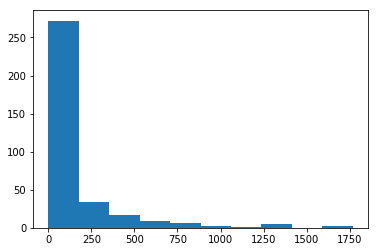

In [59]:

#non passing minutes spent histogram
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(non_passing_minutes.values())

In [35]:
#Passing student minutes histo
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(passing_minutes.values())

NameError: name 'passing_minutes' is not defined

In [36]:
#NonPassing student lessons histo
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(non_passing_lessons.values())

NameError: name 'non_passing_lessons' is not defined

In [37]:
#Passing student lessons histo
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(passing_lessons.values())

NameError: name 'passing_lessons' is not defined

In [38]:
#NonPassing student visits histo
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(non_passing_visits.values())

NameError: name 'non_passing_visits' is not defined

In [39]:
#Passing student visits histo
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(passing_visits.values())

NameError: name 'passing_visits' is not defined